# k-Nearest Neighbors (k-NN) Algorithm <a href="https://colab.research.google.com/github/burakai/ENGR4450/blob/main/4_support-vector-machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k-Nearest Neighbors (k-NN) is a simple, intuitive, and widely-used algorithm for both classification and regression tasks in machine learning. It is a type of instance-based learning, where the algorithm learns from the training dataset and makes predictions based on the proximity of the input data to the training examples.

The k-NN algorithm operates on the following principles:

1. **Distance Metric**: k-NN relies on a distance metric (commonly Euclidean distance) to measure the similarity between data points. The distance between two points \( x \) and \( y \) in an n-dimensional space is calculated as:
   \[
   d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
   \]

2. **Choosing k**: The parameter \( k \) represents the number of nearest neighbors to consider when making a prediction. The choice of \( k \) can significantly influence the model's performance:
   - A small value of \( k \) (e.g., \( k = 1 \)) can lead to overfitting, as the model may be too sensitive to noise in the training data.
   - A larger value of \( k \) tends to smooth out predictions but may overlook local patterns in the data.

3. **Prediction**:
   - **Classification**: For a classification task, the algorithm assigns the class label that is most common among the \( k \) nearest neighbors. This is often done using a majority vote.
   - **Regression**: For regression tasks, the prediction is typically the average of the values of the \( k \) nearest neighbors.

### Advantages
- **Simplicity**: k-NN is easy to understand and implement.
- **No Training Phase**: The algorithm does not require a training phase; it simply stores the training instances and makes predictions on the fly.
- **Flexible**: It can be used for both classification and regression problems.

### Disadvantages
- **Computationally Expensive**: k-NN can be slow, especially with large datasets, as it requires calculating the distance to every training instance for each prediction.
- **Curse of Dimensionality**: The performance of k-NN can degrade with high-dimensional data due to the sparsity of the data points.
- **Sensitive to Irrelevant Features**: The presence of irrelevant features can affect the distance calculations and, consequently, the predictions.

One of the primary advantages of the k-Nearest Neighbors (k-NN) algorithm is its simplicity and ease of implementation, making it an excellent choice for beginners in machine learning. Unlike many other algorithms, k-NN does not require a training phase; it stores the training instances and performs predictions on-the-fly, which allows for quick model development. Additionally, k-NN is highly flexible, as it can be applied to both classification and regression tasks, making it a versatile tool in various domains. Its intuitive nature enables practitioners to understand and visualize how predictions are made, further enhancing its appeal. Overall, k-NN's straightforward approach and adaptability contribute to its popularity in machine learning applications.


## Implemention Using `scikit-learn`

#### Import Libraries

The necessary libraries are imported for data manipulation, visualization, and machine learning.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Load Dataset

The Iris dataset is loaded using load_iris() from sklearn.datasets.

In [4]:
# Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

#### Data Preparation

The dataset is split into training and testing sets using train_test_split().

In [5]:
# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])
print(iris_df.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


#### Model Training

A k-NN classifier is initialized and fitted to the training data.

In [6]:
# Initialize the k-NN classifier
k = 3  # You can change this value to experiment with different values of k
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Prediction

The model makes predictions on the test set.

In [7]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

#### Evaluation

The model's accuracy, confusion matrix, and classification report are printed.

In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Visualization

A simple scatter plot is generated to visualize the true vs predicted labels (only works well with 2D data).

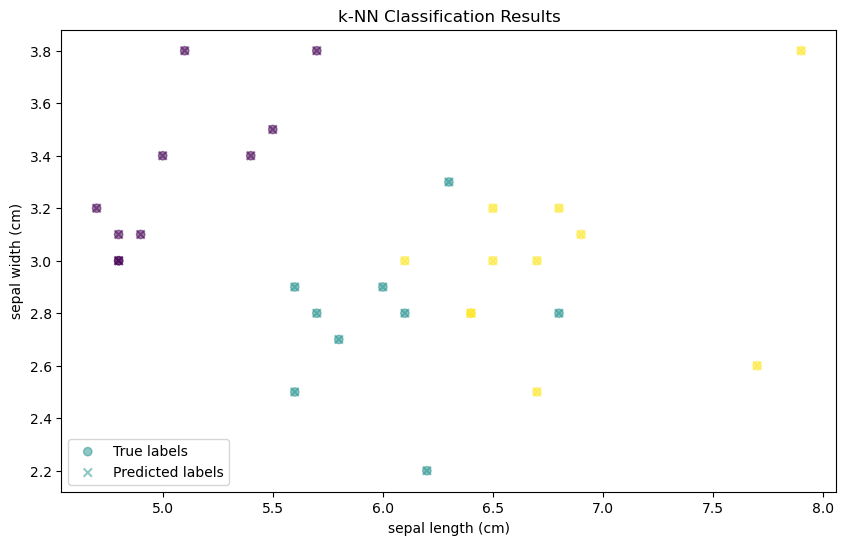

In [9]:
# Optional: Visualize the results (for 2D data)
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='True labels', alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', label='Predicted labels', alpha=0.5)
plt.title('k-NN Classification Results')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()